# Update:

  >data type `date / time` in the `pandas` library
  
  > see [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [2]:
%pwd

'/home/u1/22_dydaktyka/04inzynier/notebooks'

In [3]:
%cd ../proj1/data/
%ls

/home/u1/22_dydaktyka/04inzynier/proj1/data
countryPopulation.csv  covid.csv


# A column containing data of the `date` type

In [4]:
df = pd.read_csv('covid.csv',sep=';')
print(df.dtypes)
df.head(3)

Date         object
Country      object
Ncases        int64
CumCases      int64
Ndeaths       int64
Cumdeaths     int64
dtype: object


,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-07-30,Afghanistan,71,36628,0,1275
2,2020-07-29,Afghanistan,103,36557,1,1275


In [5]:
# 'Date' columns is `object (str)` type
# data type conversion to 'datetime'
dats = pd.to_datetime(df.Date)
print(dats.dtypes)
dats

datetime64[ns]


0       2020-01-03
1       2020-07-30
2       2020-07-29
3       2020-07-28
4       2020-07-27
           ...    
72375   2020-04-10
72376   2020-04-09
72377   2020-04-08
72378   2020-04-15
72379   2020-11-05
Name: Date, Length: 72380, dtype: datetime64[ns]

In [6]:
# change data in a df.Date column
df.loc[:,'Date'] = dats

df.sort_values(['Country','Date'],inplace=True)
df.head(3)

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
0,2020-01-03,Afghanistan,0,0,0,0
232,2020-01-04,Afghanistan,0,0,0,0
208,2020-01-05,Afghanistan,0,0,0,0


### Examples of operations on type `datetime`

In [7]:
print(f'{df.Date.dt.month}\n{df.Date.dt.month.unique()}')

0         1
232       1
208       1
207       1
206       1
         ..
32745    11
34264    11
48144    11
48760    11
51281    11
Name: Date, Length: 72380, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11]


In [8]:
pd.DataFrame({'no':df.Date.dt.month.unique(), 'name':df.Date.dt.month_name().unique()})

,no,name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May
5,6,June
6,7,July
7,8,August
8,9,September
9,10,October


In [9]:
df.Date.dt.day_name().unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [10]:
#different ways to display the date
print(f'''{dats.dt.strftime('%Y%m%d').unique()[:5]}\n\n\
{dats.dt.strftime('%Y:%m:%d').unique()[:5]}\n\n\
{dats.dt.strftime('%d/%m/%Y').unique()[:5]}''')

['20200103' '20200730' '20200729' '20200728' '20200727']

['2020:01:03' '2020:07:30' '2020:07:29' '2020:07:28' '2020:07:27']

['03/01/2020' '30/07/2020' '29/07/2020' '28/07/2020' '27/07/2020']


## Graph of the number of cases during one month

In [11]:
idx = (df.Date.dt.month == 10) & (df.Country == 'Poland')
tmp = df.loc[idx,['Date','Ncases']]
print(tmp.shape)
tmp.head()

(31, 2)


,Date,Ncases
51540,2020-10-01,1552
51528,2020-10-02,1967
51527,2020-10-03,2292
51526,2020-10-04,2367
51525,2020-10-05,0


### curve fitting

$$f(x) = a_0 + a_1 x_1 + a_2 x_2^2 + ...$$
$$f(x) = e^x$$

In [12]:
from scipy.optimize import curve_fit

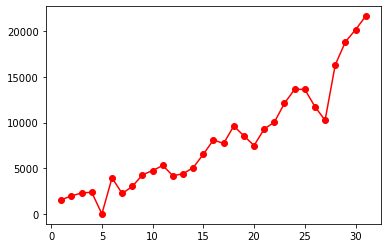

In [13]:
x = np.arange(1,tmp.shape[0]+1)
y = tmp.Ncases
plt.plot(x,y,marker='o',color='red');

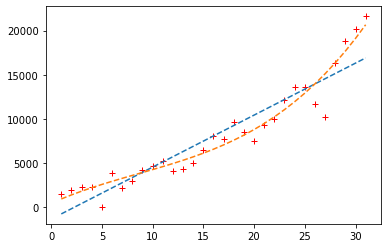

In [14]:
# polynomial fitting - various degrees
coef1 = np.polyfit(x,y,1)
poly1 = np.poly1d(coef1)
yy1 = poly1(x)

coef2 = np.polyfit(x,y,3)
poly2 = np.poly1d(coef2)
yy2 = poly2(x)

plt.plot(x,y,'+r')
plt.plot(x,yy1,'--')
plt.plot(x,yy2,'--')

In [15]:
# fitting exp(x)
def f1(b,x):
    return np.exp(b*x)

In [16]:
c_exp,_ = curve_fit(f1,x,y)
c_exp

array([0.33189206])

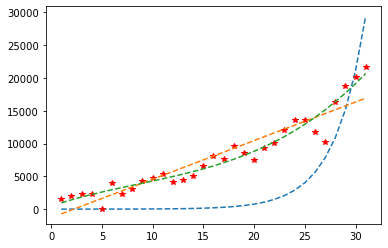

In [17]:
ye = f1(*c_exp,x)
plt.plot(x,ye,'--')

plt.plot(x,y,'*r')
plt.plot(x,yy1,'--')
plt.plot(x,yy2,'--')

# Dates as an index of the data frame

In [18]:
df = pd.read_csv('covid.csv',sep=';')

# country specific data selection
#idx = df.Country == 'Afghanistan'
idx = df.Country == 'Poland'
tmp = df.loc[idx].copy()

#dats = pd.to_datetime(df.Date)
dats = pd.to_datetime(tmp.Date)
# Set the time interval according to the data - every one day
dats = dats.dt.to_period('D')

#changing the data type and setting the index
tmp.loc[:,'Date'] = dats.copy()
tmp.set_index('Date',inplace=True)
tmp.head()


,Country,Ncases,CumCases,Ndeaths,Cumdeaths
Date,,,,,
2020-07-29,Poland,502,43904,6,1682
2020-07-28,Poland,337,43402,5,1676
2020-07-27,Poland,443,43065,7,1671
2020-07-26,Poland,584,42622,9,1664
2020-07-25,Poland,458,42038,4,1655


In [19]:
#Summary of the selected month
tmp.loc['2020-10',['Ncases','Ndeaths']].sum()

Ncases     250872
Ndeaths      2868
dtype: int64

In [20]:
# data resample (M - month) and summary
tmp.loc[:,['Ncases','Ndeaths']].resample('M').sum()

,Ncases,Ndeaths
Date,,
2020-01,0,0
2020-02,0,0
2020-03,2055,31
2020-04,10585,593
2020-05,10931,437
2020-06,10583,383
2020-07,10877,265
2020-08,21839,324
2020-09,23092,450


In [21]:
# get months
tmp.index.month

Int64Index([7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date', length=308)

In [22]:
# another way to summarize each month
tmp.loc[:,['Ncases','Ndeaths']].groupby([tmp.index.month]).sum()

,Ncases,Ndeaths
Date,,
1,0,0
2,0,0
3,2055,31
4,10585,593
5,10931,437
6,10583,383
7,10877,265
8,21839,324
9,23092,450


In [23]:
# generating a date range: year 2020, 11 months
pd.date_range('2020', freq='M', periods=11)

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', freq='M')

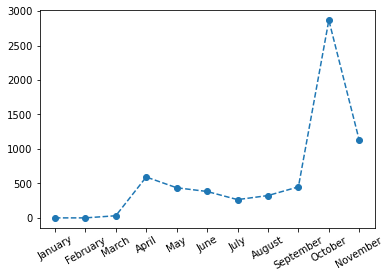

In [24]:
# chart of changes in monthly infections
monthSum = tmp.resample('M').sum()
x = range(1,monthSum.shape[0]+1)

plt.plot(x,monthSum.Ndeaths,marker='o',linestyle='--');

# creating dates for each month and using their word names as labels for the 'ox' axis
xlabel = pd.date_range('2020', freq='M', periods=11)
plt.xticks(x,xlabel.month_name(),rotation=30);

In [25]:
#